#  Face Detection using Haar Cascade and HOG Algorithm


<br>
<br>
This notebook deals with detecting human faces using the Haar Cascade classifier and HOG. Although, after the deep learning revolution there are various CNN architectures and State of the art techniques which produces better accuracy and faster compution, these conventional algorithms are still in existence and provide greater results for sim.



## Haar Cascade Classifier

In [1]:
#importing libraries

import cv2
import matplotlib.pyplot as plt

In [2]:
#Loading image

image = cv2.imread('British Royal family.jpg')  #Reads in BGR Format

image.shape #(Height, Width, no of channels)

(549, 976, 3)

### Displaying the image

In [3]:
#Displaying the image in a new window using imshow

cv2.imshow('image',image)
cv2.waitKey(0)  

-1

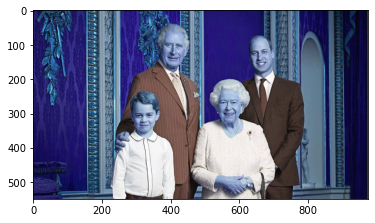

In [4]:
#Displaying the image using matplotlib.pyplot

#Matplotlib imshow needs the image to be present as RGB format as cv2 has read the image as BGR format
#Hence, image is not displayed in desired colors

plt.imshow(image)  

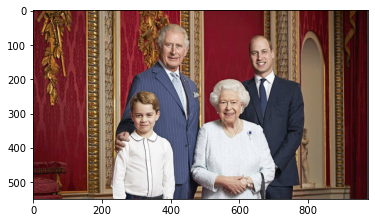

In [5]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Converts the image to RGB format

plt.imshow(image_rgb); #Displays the image

In [6]:
image = cv2.resize(image, (900,500)) #resizing the image 

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #changing to Grayscale

In [7]:
cv2.imshow('image',image_gray)
cv2.waitKey(0)

-1

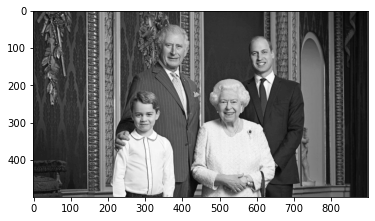

In [8]:
plt.imshow(image_gray, cmap='gray');

### Detecting faces

Inorder to use the Haar Cascade classifier algorithm from opencv, we need to download the face detection XML file from opencv, HaarCascade github reposity and get the <b>"haarcascade_frontalface_default.xml"</b>:

https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_frontalface_default.xml



In [9]:
face_detect = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [10]:
detections = face_detect.detectMultiScale(image_gray)

In [11]:
detections

array([[263, 250,  73,  73],
       [644, 132,  48,  48],
       [362, 159,  36,  36],
       [338,  62,  82,  82],
       [572,  82,  78,  78],
       [642,  94,  52,  52],
       [493, 218,  68,  68]], dtype=int32)

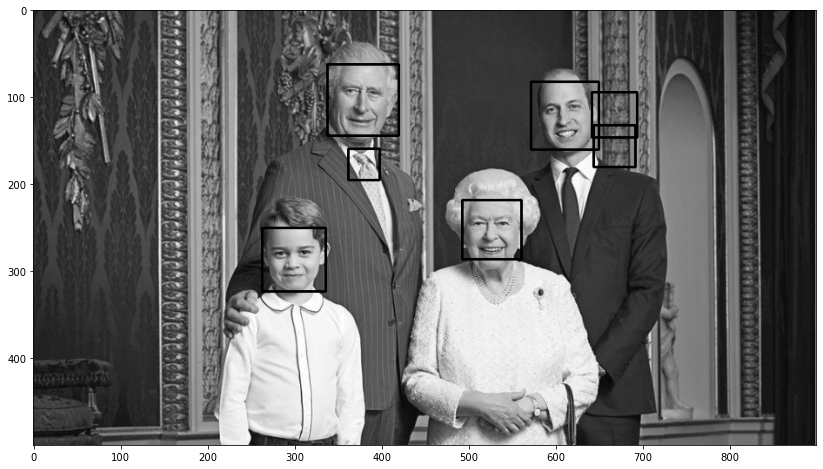

In [12]:
for x,y,width,height in detections:
    cv2.rectangle(image_gray, (x,y), (x + width, y + height), (0,255,255), 2)

plt.figure(figsize=(15,8))
plt.imshow(image_gray, cmap='gray');

### Defining function to change hyper parameters

In [13]:
def face_detector(image,scale_factor = 1.1):
    
    #Converting to Gray Scale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
    
    #Detecting faces
    detections = face_detect.detectMultiScale(image_gray,scaleFactor = scale_factor)
    print(f"Number of faces detected: {len(detections)}")

    #Adding Square boxes for identified images
    for x,y,width,height in detections:
        cv2.rectangle(image, (x,y), (x + width, y + height), (0,255,255), 2) 
    
    #Converting to RGB and Displaying in matplotlib.pyplot
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    plt.figure(figsize=(15,8))
    plt.imshow(image);

Number of faces detected: 4


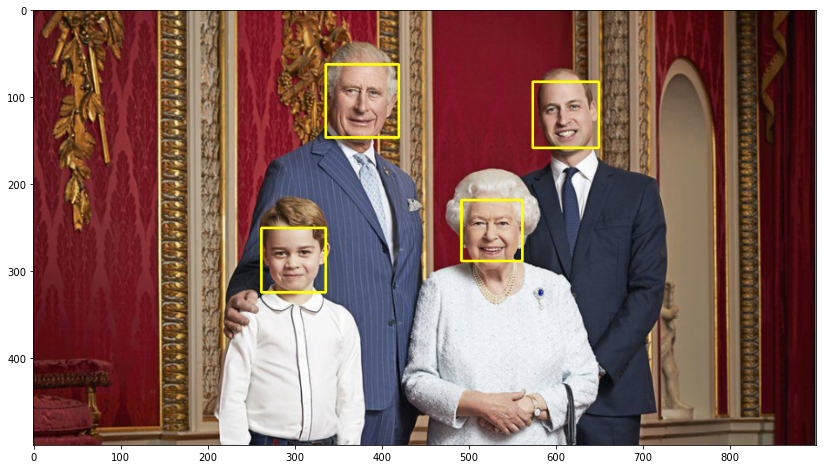

In [14]:
image = cv2.imread('British Royal family.jpg')

image = cv2.resize(image, (900,500))

#Adjust the scaleFactor parameter based on the application. Larger the faces, greater the scaleFactor value. 
face_detector(image,1.3)


### Image 2 - Containing More faces

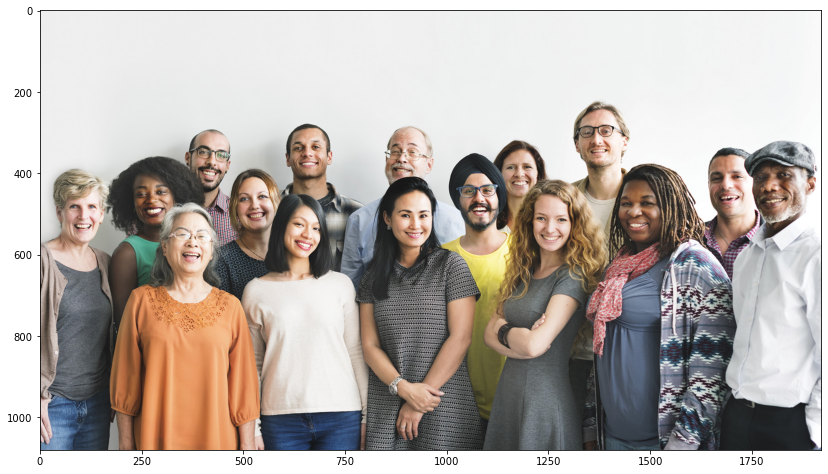

In [15]:
image = cv2.imread('More People.jpg')

img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(14,10))
plt.imshow(img_rgb);

Number of faces detected: 17


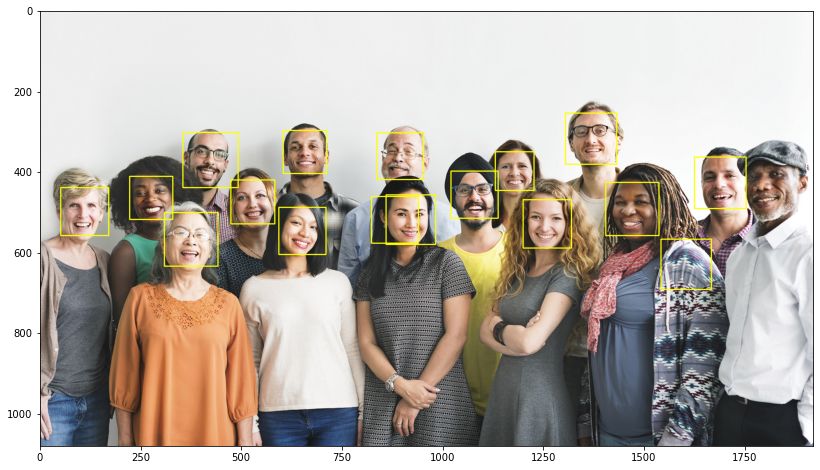

In [16]:
face_detector(image,1.3)

##### The Haar Cascade algorithm above has almost detected all faces, but it has 1 false positive and true negative also detected a face twice. 

##### Tuning the hyper parameters similar to first example can improve the algorithm classification. 
<br>

## Histogram of Oriented Gradients (HOG)

The Histogram of Oriented Gradients (HOG) is a feature detection technique which is more accurate and involves greater computation than the Haar Cascade classifier technique. This technique can be also be used in combination with other classification models, where HOG technique is used for detecting the features and the model classifies the object detection. 

For object detection, it can be utlized in Python from Dlib API which is a C++ toolkit

In [17]:
import dlib

In [18]:
image = cv2.imread('British Royal family.jpg')

In [19]:
#Conversion to Grayscale is not required in HOG technique as used in Haar Cascade

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

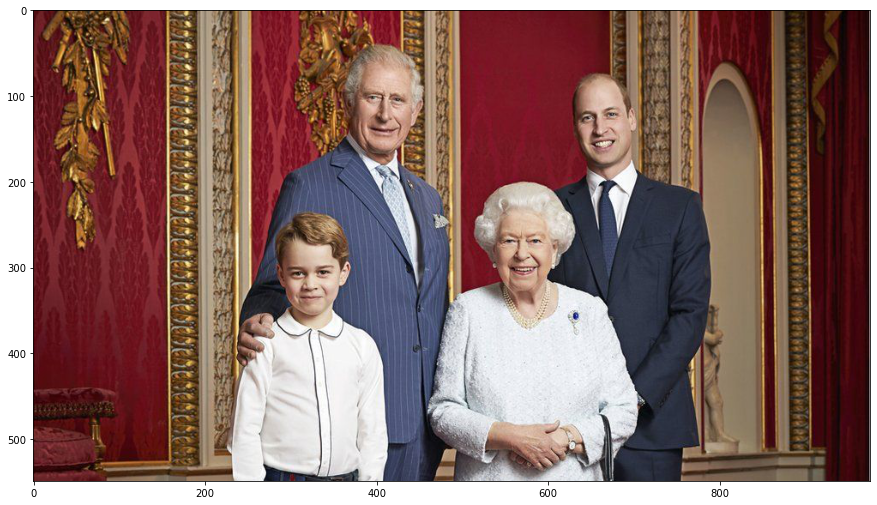

In [20]:
plt.figure(figsize = (15,10))

plt.imshow(image_rgb);

In [21]:
hog_face_detector = dlib.get_frontal_face_detector()

In [22]:
detections = hog_face_detector(image, 1)

In [23]:
len(detections)

4

In [24]:
detections

rectangles[[(619, 96) (693, 171)], [(287, 287) (361, 362)], [(364, 76) (454, 166)], [(536, 246) (610, 320)]]

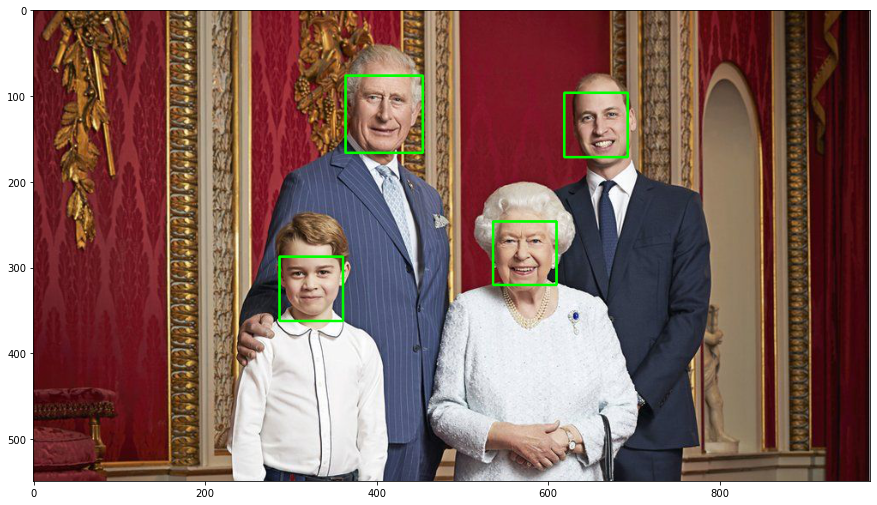

In [25]:
for face in detections:
    
    left = face.left()
    top = face.top()
    right = face.right()
    bottom = face.bottom()
    cv2.rectangle(image_rgb, (left, top), (right, bottom), (0,255,0), 2)


plt.figure(figsize=(15,10))    
plt.imshow(image_rgb);

### Image 2 

In [26]:
#Reading the image

image_2 = cv2.imread('More People.jpg')

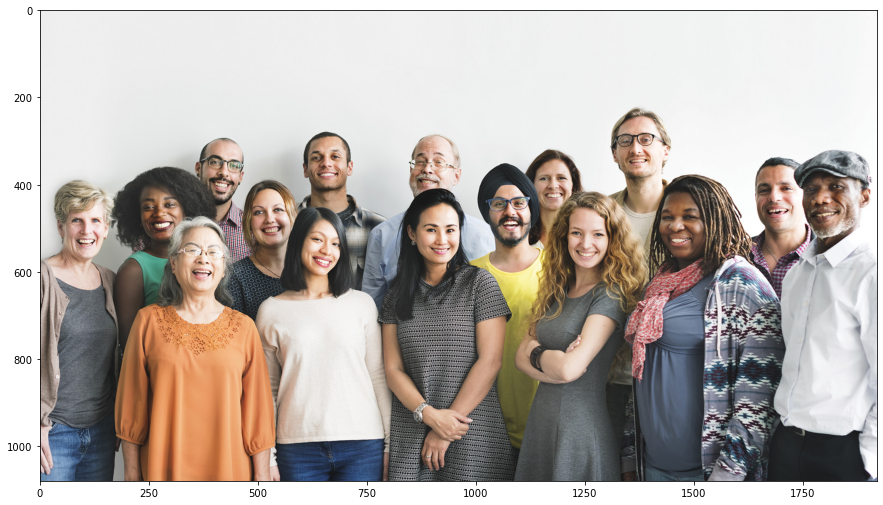

In [27]:
#Displaying the image using matplotlib.pyplot


image_2_bgr = cv2.cvtColor(image_2, cv2.COLOR_RGB2BGR)
plt.figure(figsize=(15,10))

plt.imshow(image_2_bgr);

In [28]:
detections_2 = hog_face_detector(image_2, 1)

In [29]:
detections_2

rectangles[[(868, 474) (975, 582)], [(1202, 486) (1310, 593)], [(1131, 365) (1220, 454)], [(474, 426) (581, 534)], [(1023, 414) (1130, 522)], [(318, 522) (426, 629)], [(1400, 426) (1529, 555)], [(613, 315) (703, 405)], [(1300, 254) (1429, 383)], [(223, 414) (330, 522)], [(55, 462) (163, 570)], [(603, 504) (693, 594)], [(366, 319) (474, 426)], [(1615, 368) (1744, 497)]]

In [30]:
len(detections_2)

14

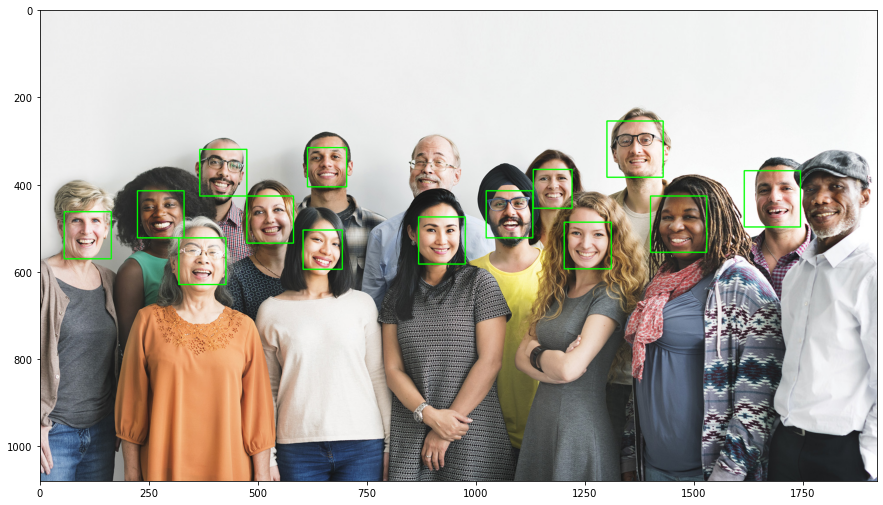

In [33]:
for face in detections_2:
    
    left = face.left()
    top = face.top()
    right = face.right()
    bottom = face.bottom()
    cv2.rectangle(image_2_bgr, (left, top), (right, bottom), (0,255,0), 2)
    
plt.figure(figsize=(15,10))    
plt.imshow(image_2_bgr);